# Similar Melody Detection using Probabilistic Learning

## Problem Statement

> Two song or track X and Y will be called similar melody if both of the tracks are having common Musical Notes(a.k.a Frequency) in their Audio Wave Time series.

## Tasks

1. **Data Set Discovery** : It's a process of crawling/sourcing RAW Data for Data Mining and applying Probabilistic Learning. Raw Data is in a list of mp3 pairs where each pair contains `(original song, cover song)`


2. **Exploratory Data Analysis (E.D.A) :** It's the process of extracting or summarizing meaningful insights from Data through Statistical Analysis & Data Visualizations


3. **Feature Engineering** : It's the process of choosing right feature vector for training any Machine Learning Model. We'll use co-relation Matrix and Plot Heat Map to see dominating areas/feature pairs


4. **ML/Probalilistic Model Selection** : It's the process of choosing correct Machine Learning Model, train with features, validate accuracy and choose the best Model/Algorithms over all. 


5. **Hypothesis Testing** : A statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis


## Install/Upgrade Dependencies

In [ ]:
!pip3 install --upgrade numpy
!pip3 install --upgrade cython
!pip3 install --upgrade librosa
!pip3 install --upgrade tensorflow
!pip3 install --upgrade keras
!pip3 install --upgrade seaborn

## DataSet used

| Original Song & Cover Song Pair

In [59]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import librosa
import os

%matplotlib inline

In [54]:
DATA_DIR = f"./data/"

## Constants for DataSets
COVER_SONGS = "COVER_SONGS"

dataset_paths = {
    COVER_SONGS: f"{DATA_DIR}coversongs/covers32k/"
}


# sample_file = f"{DATA_DIR}"
# y, sr = librosa.load(filename)
# y

# filePath = lambda dataset : f"{dataset_paths[COVER_SONGS]}/{dataset}"

# songs = os.listdir(dataset_paths[COVER_SONGS] )




In [55]:
## Use any two pair of files ( Once contains Actual Song andohter contains Cover )
song_a = f"{dataset_paths[COVER_SONGS]}My_Heart_Will_Go_On/celine_dion+Au_Coer_Du_Stade+11-My_Heart_Will_Go_On.mp3" 
song_b = f"{dataset_paths[COVER_SONGS]}My_Heart_Will_Go_On/new_found_glory+From_the_Screen_to_Your_Stereo+07-My_Heart_Will_Go_On.mp3" 

song , song_sr = librosa.load(song_a)
cover, cover_sr = librosa.load(song_b)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [86]:
print(f"Song Shape : {song.shape}\n Cover Shape: {cover.shape}\n\n")
print(f"Song Sample Rate : {song_sr}\n Cover Sample Rate: {cover_sr} ")                                                                             


Song Shape : (7118799,)
 Cover Shape: (4043618,)


Song Sample Rate : 22050
 Cover Sample Rate: 22050 


In [16]:
# Sample Rate
sr

22050

### Display Audio Playback Options

In [ ]:
> *Actual Song* : 

In [105]:
import IPython

# Original Song Playback
IPython.display.Audio(filename=song_a, rate=song_sr)

In [106]:
# Display Cover Song Playback
IPython.display.Audio(filename=song_b, rate=cover_sr)


### Plot Original Song Sound Wave

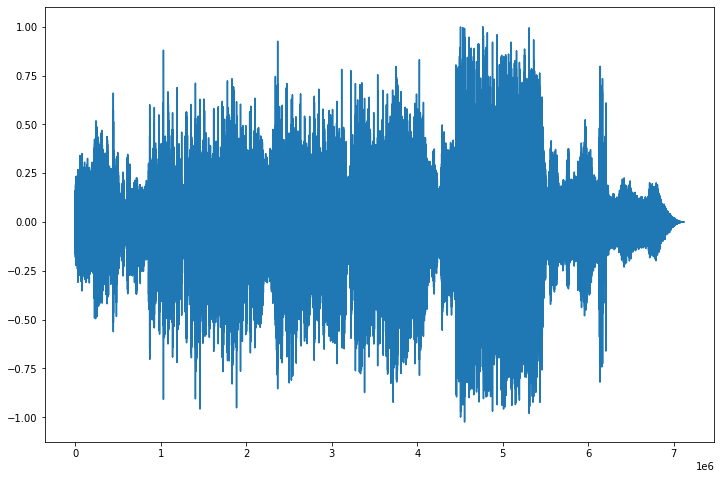

In [31]:
pt.figure(figsize=(12, 8))
pt.plot(song)


pt.show()

> Inspect More zoomed view

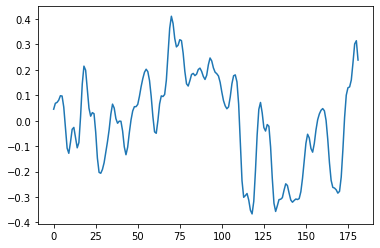

In [42]:
pt.plot(song[4041018:4041200 ])
pt.show()

### Plot Cover Song

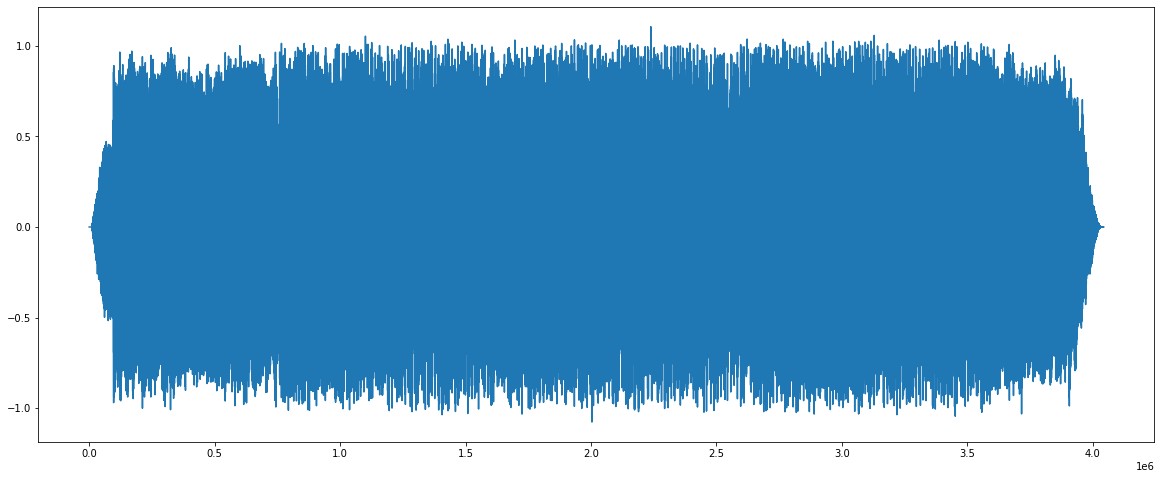

In [36]:
pt.figure(figsize=(20, 8))
pt.plot(cover)


pt.show()

> Inspect Wave in more zoomed time frame

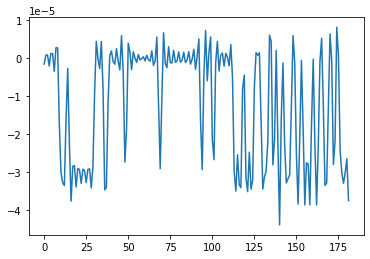

In [40]:
pt.plot(cover[4041018:4041200 ])
pt.show()

In [20]:
sr

22050

## Time Domain Audio Signal Analysis using Mel Spectogram


In [45]:
# Show Frequencies Spectogram for Original Song

mel_spectogram_song = librosa.feature.melspectrogram(y=song, sr=song_sr)

mel_spectogram_song

array([[1.1996138e-12, 1.4730556e-06, 2.6076719e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2408711e-12, 3.0637643e-06, 9.1412265e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5777050e-13, 2.2298414e-06, 2.2646805e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9775834e-19, 1.2746767e-17, 1.4180954e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4597808e-19, 7.4103157e-18, 1.5332839e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1863156e-19, 3.8806326e-18, 1.5567940e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

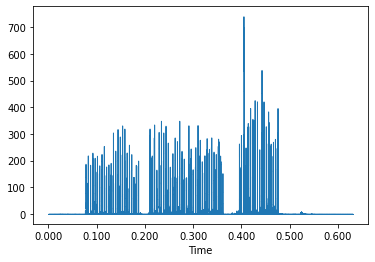

In [52]:
import seaborn as sns
## For Displaying Frequency Domain Time Series
import librosa.display

# Display Mel Spectogram for Original Song
librosa.display.waveshow(mel_spectogram_song)

In [45]:
# Show Frequencies Spectogram for Original Song

mel_spectogram_cover = librosa.feature.melspectrogram(y=song, sr=song_sr)

mel_spectogram_song

array([[1.1996138e-12, 1.4730556e-06, 2.6076719e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2408711e-12, 3.0637643e-06, 9.1412265e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5777050e-13, 2.2298414e-06, 2.2646805e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.9775834e-19, 1.2746767e-17, 1.4180954e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4597808e-19, 7.4103157e-18, 1.5332839e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1863156e-19, 3.8806326e-18, 1.5567940e-15, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

<hr />



## Fourier Transformation of Audio Signals

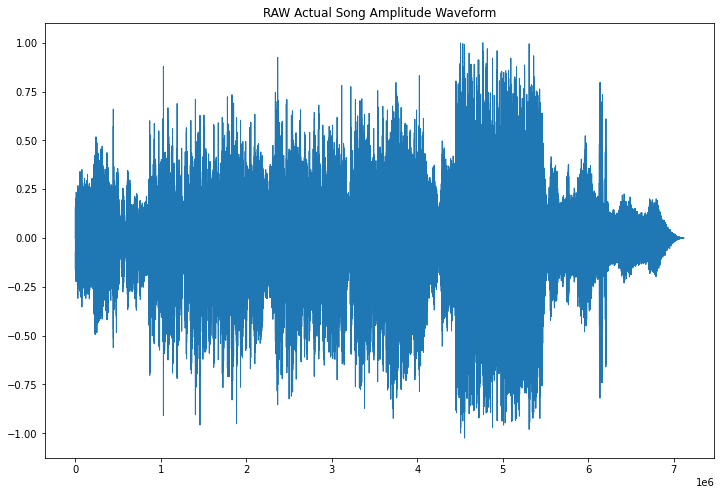

In [62]:
pd.Series(song).plot(figsize=(12,8), lw=1, title='RAW Actual Song Amplitude Waveform')
pt.show()

In [83]:
# Trim the wave and remove silence from front and rear

trimmed_song, _ = librosa.effects.trim(song, top_db = 20)

trimmed_song, np.shape(trimmed_song, )

(array([-5.1460821e-02, -1.4349226e-02,  4.1637808e-02, ...,
         1.8470801e-02,  1.5494228e-02, -5.5854114e-05], dtype=float32),
 (6817792,))

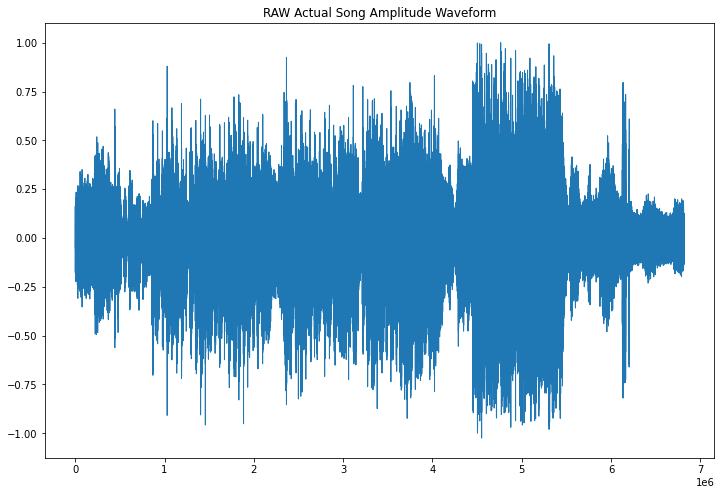

In [85]:
pd.Series(trimmed_song).plot(figsize=(12,8), lw=1, title='RAW Actual Song Amplitude Waveform')
pt.show()

In [88]:
D = librosa.stft(trimmed_song)
s_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape

(1025, 13317)

### Visualize Spectogram of Original Song

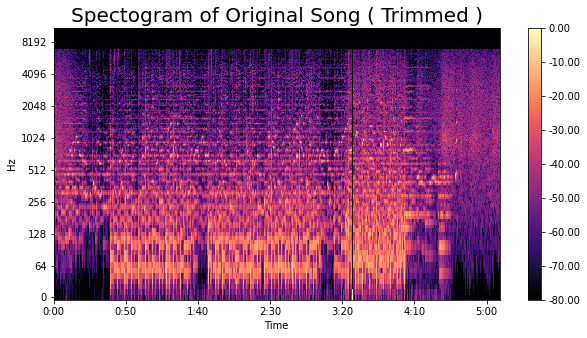

In [95]:
# plot

fig, ax = pt.subplots(figsize=(10,5))
img = librosa.display.specshow(
    s_db, x_axis = 'time', y_axis = 'log', ax = ax)

ax.set_title('Spectogram of Original Song ( Trimmed )', fontsize=20)
fig.colorbar(img, ax=ax,format =f'%0.2f')
pt.show()


<hr /> 
<b>Spectogram of Cover song</b>

In [96]:
# Trim the wave and remove silence from front and rear

trimmed_cover, _ = librosa.effects.trim(cover, top_db = 20)

trimmed_cover, np.shape(trimmed_cover)

(array([-0.01484096, -0.03070064, -0.04236884, ...,  0.00271904,
         0.00770652,  0.01742867], dtype=float32),
 (3979776,))

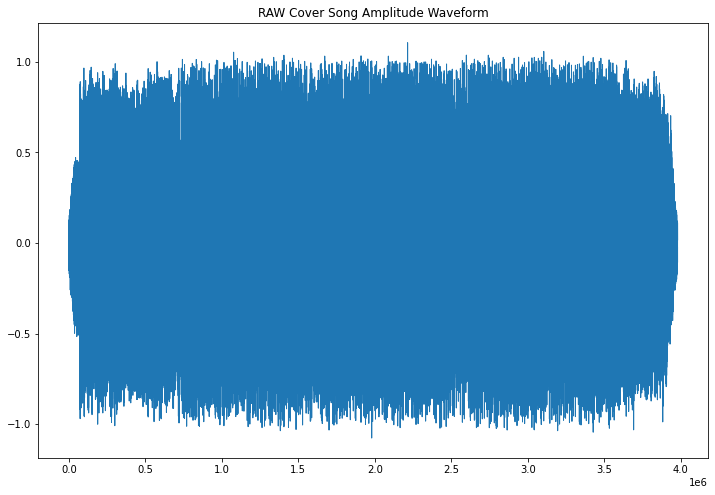

In [97]:
pd.Series(trimmed_cover).plot(figsize=(12,8), lw=1, title='RAW Cover Song Amplitude Waveform')
pt.show()

### Short Time Fourier Transformation

In [103]:

D2 = librosa.stft(trimmed_cover)
s_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)
s_db2.shape

(1025, 7774)

## Visualize Spectogram of Cover Song

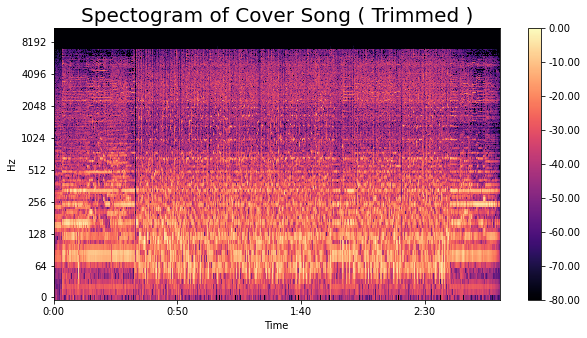

In [104]:
# plot

fig2, ax2 = pt.subplots(figsize=(10,5))
img2 = librosa.display.specshow(
    s_db2, x_axis = 'time', y_axis = 'log', ax = ax2)

ax2.set_title('Spectogram of Cover Song ( Trimmed )', fontsize=20)
fig2.colorbar(img, ax=ax2,format =f'%0.2f')
pt.show()

## Visualize Mel ( Melodic ) Spectogram

In [108]:
mel_song = librosa.feature.melspectrogram(y=trimmed_song, sr=song_sr, n_mels = 128 )
mel_song, mel_song.shape

(array([[6.1277896e-03, 1.3592091e-03, 6.2702702e-06, ..., 3.9986224e-04,
         2.7226752e-03, 2.3441589e-03],
        [6.5733199e-03, 2.4753199e-03, 3.3918128e-03, ..., 7.0590083e-04,
         5.6704199e-03, 4.0062545e-03],
        [8.1259673e-03, 1.0686905e-02, 1.7244667e-02, ..., 1.3928037e-03,
         7.4499440e-03, 3.8735291e-03],
        ...,
        [8.4105952e-05, 2.0957137e-05, 1.4619186e-14, ..., 6.3379528e-15,
         8.5153840e-07, 3.3810759e-06],
        [8.3231505e-05, 2.0739182e-05, 1.0089117e-14, ..., 4.9658425e-15,
         8.3652287e-07, 3.3215867e-06],
        [8.2647086e-05, 2.0593507e-05, 8.7120168e-15, ..., 6.1609848e-15,
         8.2688359e-07, 3.2833880e-06]], dtype=float32),
 (128, 13317))

In [111]:
mel_song_db = librosa.amplitude_to_db(mel_song, ref = np.max)
mel_song_db, mel_song_db.shape

(array([[-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.],
        ...,
        [-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32),
 (128, 13317))

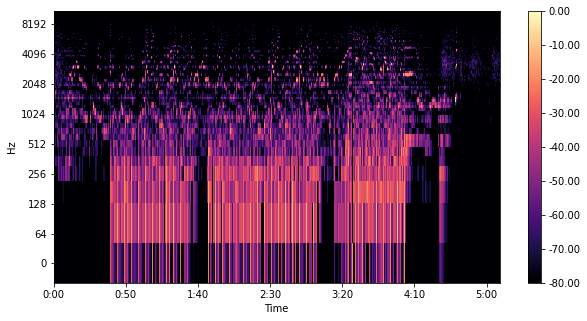

In [112]:
# plot

fig3, ax3 = pt.subplots(figsize=(10,5))
img3 = librosa.display.specshow(
    mel_song_db, x_axis = 'time', y_axis = 'log', ax = ax3)

ax2.set_title('Mel Spectogram of Actual Song ( Trimmed )', fontsize=20)
fig3.colorbar(img, ax=ax3,format =f'%0.2f')
pt.show()

<hr />
<b> Visualize Mel Spectogram of Cover song

In [114]:
mel_cover = librosa.feature.melspectrogram(y=trimmed_cover, sr=cover_sr, n_mels = 128 )
mel_cover, mel_cover.shape

(array([[5.64294383e-02, 2.41107456e-02, 3.21926326e-02, ...,
         8.77038985e-02, 1.13438398e-01, 7.68318698e-02],
        [3.40925813e-01, 4.82945502e-01, 5.89467764e-01, ...,
         3.20709385e-02, 6.82480931e-02, 7.39032328e-02],
        [1.45100856e+00, 3.96186018e+00, 5.34079409e+00, ...,
         3.30609649e-01, 3.59712452e-01, 1.19459085e-01],
        ...,
        [1.12274620e-06, 2.79002194e-07, 1.34143253e-14, ...,
         9.31891164e-15, 2.96407870e-06, 1.18152238e-05],
        [1.11530574e-06, 2.77169761e-07, 1.11516546e-14, ...,
         1.00934928e-14, 2.93256812e-06, 1.16896708e-05],
        [1.11020620e-06, 2.75912782e-07, 1.40701210e-14, ...,
         1.42286932e-14, 2.91171136e-06, 1.16065730e-05]], dtype=float32),
 (128, 7774))

In [115]:
# Convert into Decibal
mel_cover_db = librosa.amplitude_to_db(mel_cover, ref = np.max)
mel_cover_db, mel_cover_db.shape

(array([[-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      ],
        [-80.      , -80.      , -78.53692 , ..., -80.      , -80.      ,
         -80.      ],
        [-70.71272 , -61.988136, -59.394005, ..., -80.      , -80.      ,
         -80.      ],
        ...,
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      ],
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      ],
        [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
         -80.      ]], dtype=float32),
 (128, 7774))

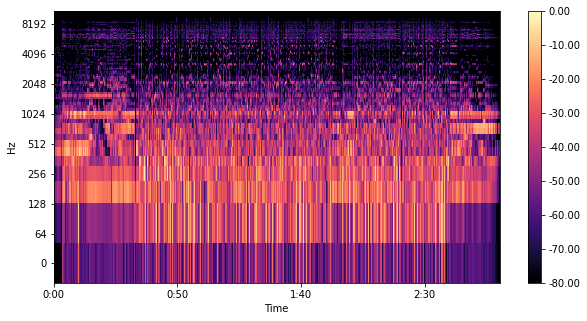

In [117]:
# plot

fig3, ax3 = pt.subplots(figsize=(10,5))
img3 = librosa.display.specshow(
    mel_cover_db, x_axis = 'time', y_axis = 'log', ax = ax3)

ax2.set_title('Mel Spectogram of Cover Song ( Trimmed )', fontsize=20)
fig3.colorbar(img, ax=ax3,format =f'%0.2f')
pt.show()